# **Hands-on Activity 9.2 Customized Visualizations using Seaborn**
**Name:** John Rome A. Belocora

**Section:** CPE22S3

# **9.4 Introduction to Seaborn**

# **About the Data**
In this notebook, we will be working with 2 datasets:
* Facebook's stock price throughout 2018 (obtained using the stock_analysis package)
* Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)
# **Setup**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

# **Categorical data**
A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards. Let's take a look at some visualizations to understand
what magTypes are used in Indonesia, the range of magnitudes there, and how many of the earthquakes are accompanied by a tsunami.


In [2]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


# stripplot()
The **stripplot()** function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a
column of our data (with the hue parameter). Using a strip plot, we can see points for each earthquake that was measured with a given magType and what its magnitude
was; however, it isn't too easy to see density of the points due to overlap:


<Axes: xlabel='magType', ylabel='mag'>

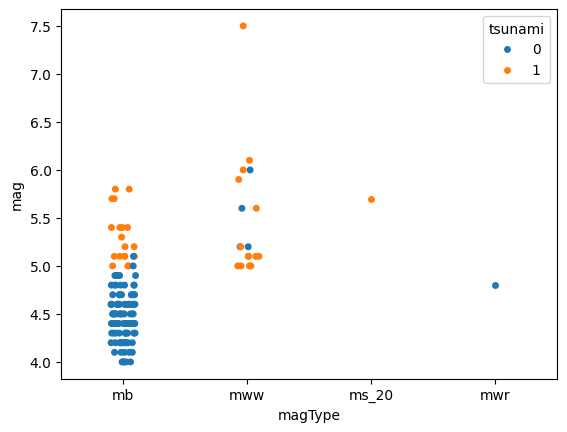

In [3]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

# swarmplot()
The bee swarm plot helps address this issue be keeping the points from overlapping. Notice how many more points we can see for the blue section of the mb magType :


<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


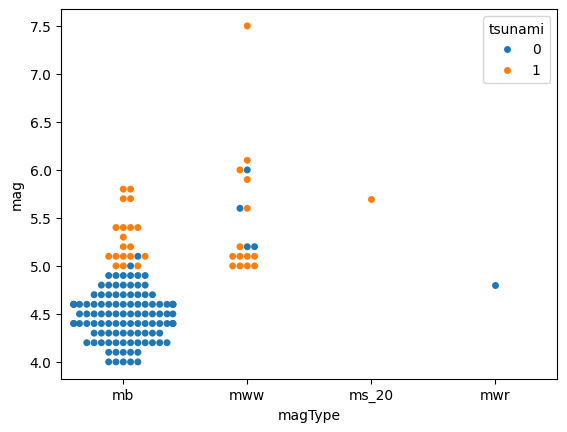

In [4]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

# **Correlations and Heatmaps**
# heatmap()
An easier way to create correlation matrix is to use seaborn :


<Axes: >

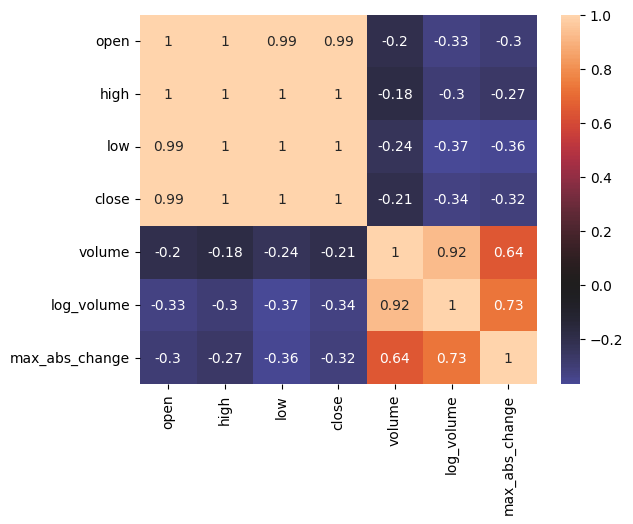

In [5]:
sns.heatmap(
    fb.sort_index().assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr(),annot=True, center=0
)

# **pairplot()**
The pair plot is seaborn's answer to the scatter matrix we saw in the pandas subplotting notebook:

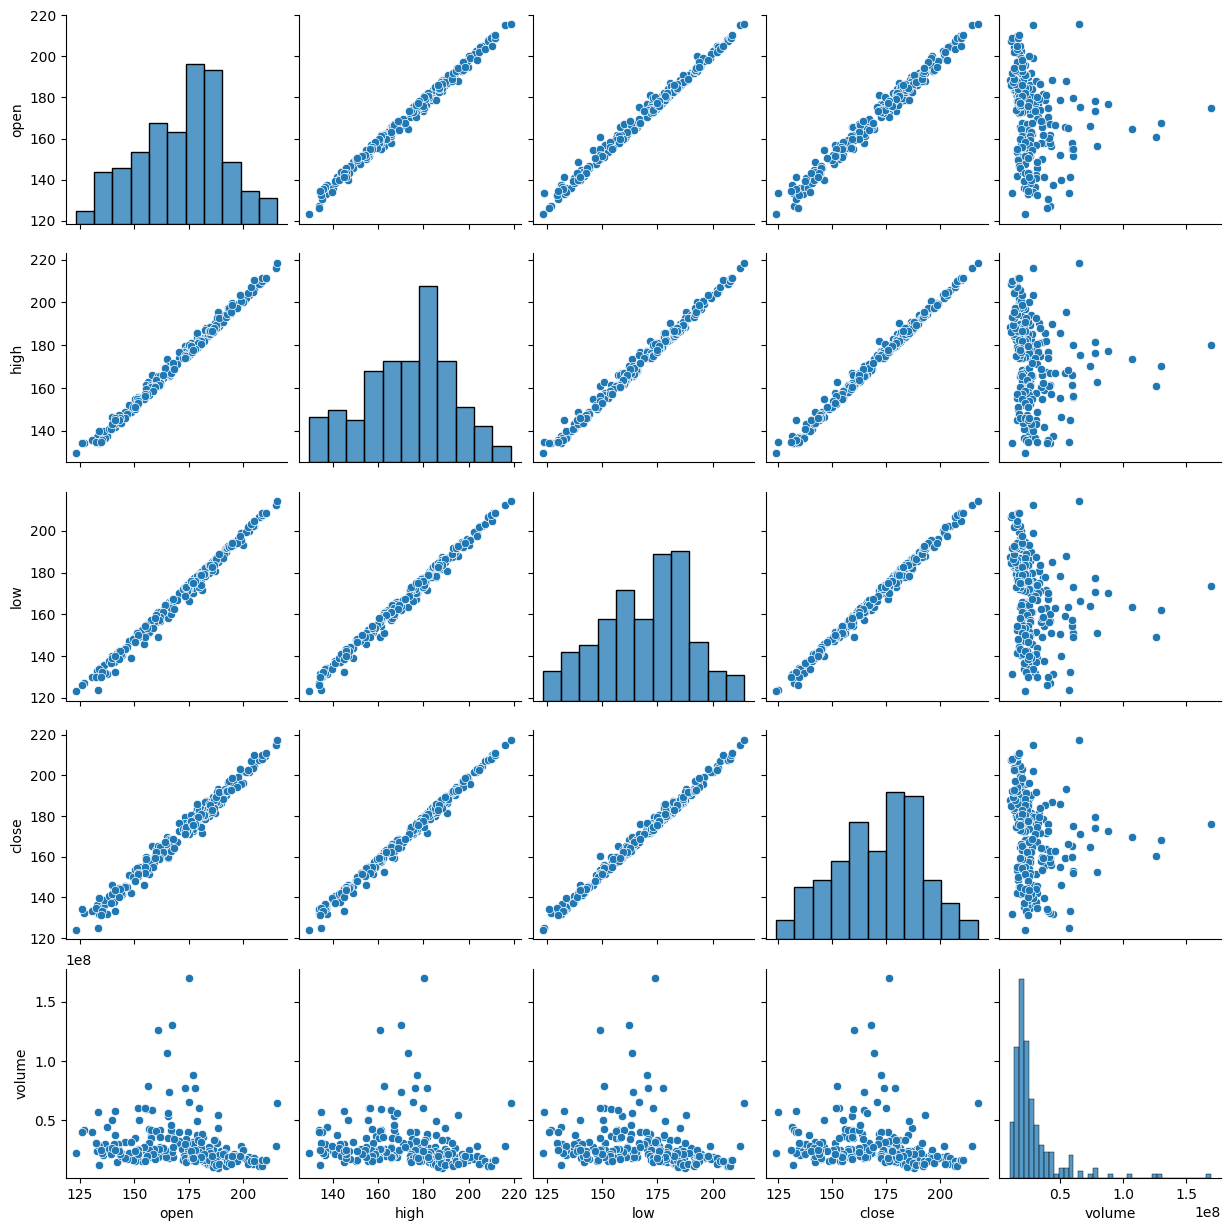

In [6]:
sns.pairplot(fb)

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the
same shape):

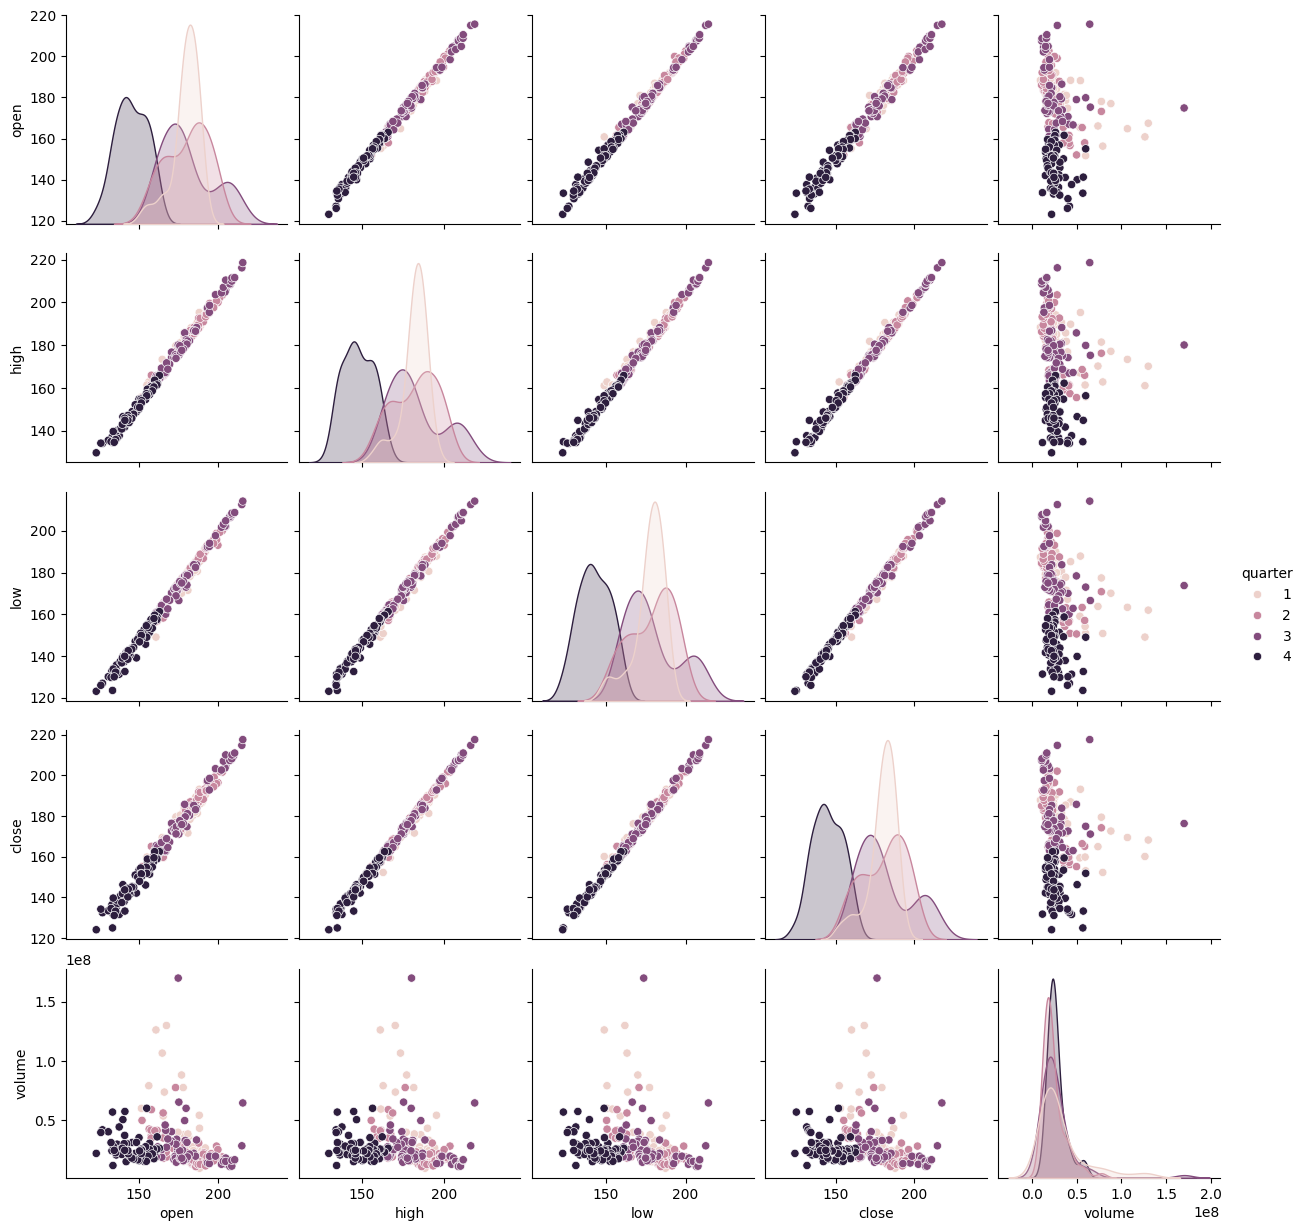

In [7]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

# **jointplot()**
The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at
the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:


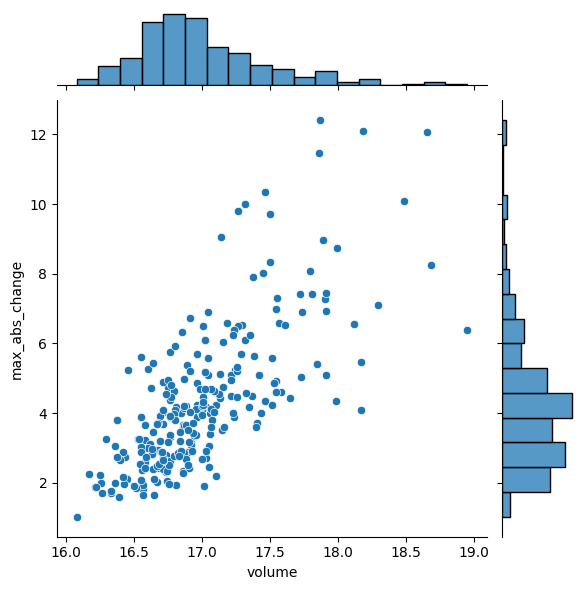

In [8]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
 )
)


By changing the kind argument, we can change how the center of the plot is displayed. For example, we can pass kind='hex' for hexbins:

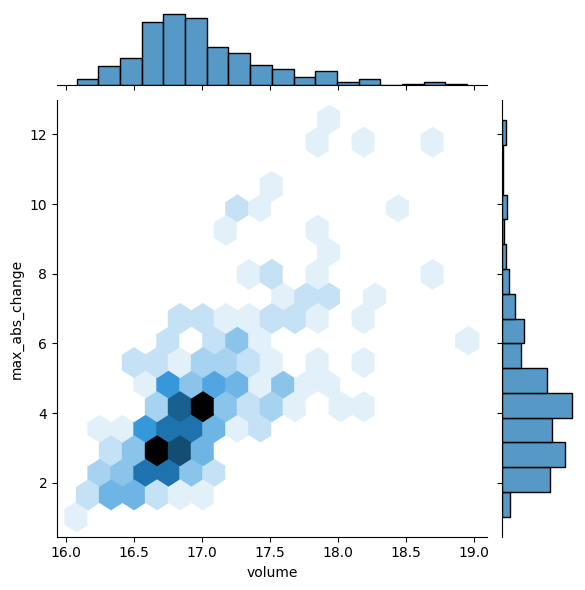

In [9]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
 )
)


If we specify kind='reg' instead, we get a regression line in the center and KDEs on the sides:

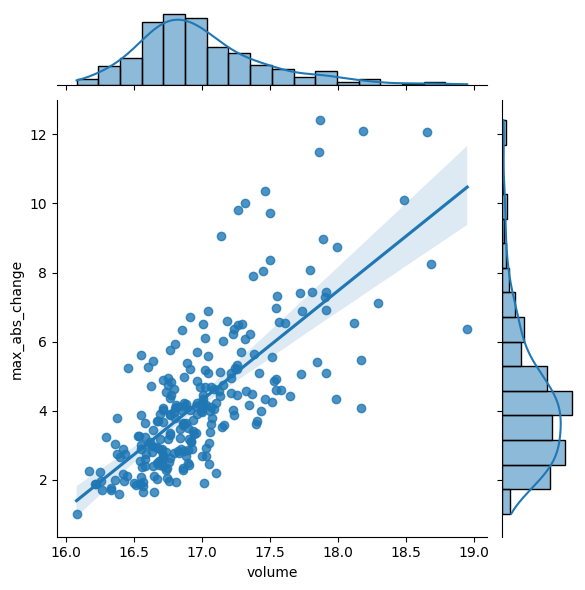

In [10]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
 )
)

If we pass kind='resid' , we get the residuals from the aforementioned regression:

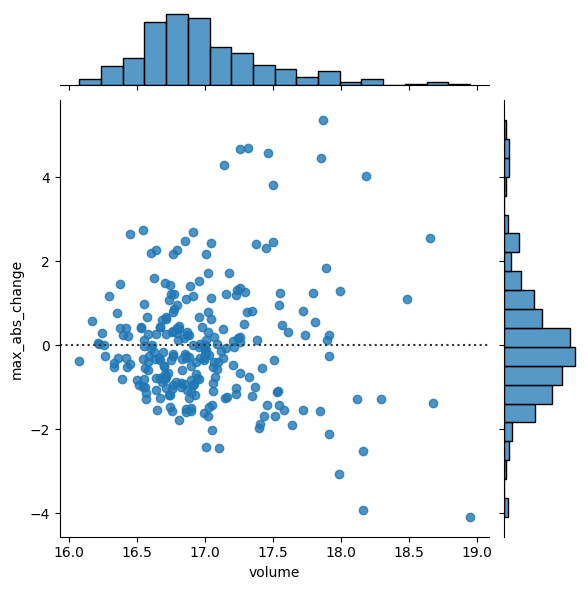

In [11]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
 )
)


Finally, if we pass kind='kde' , we get a contour plot of the joint density estimate with KDEs along the sides:

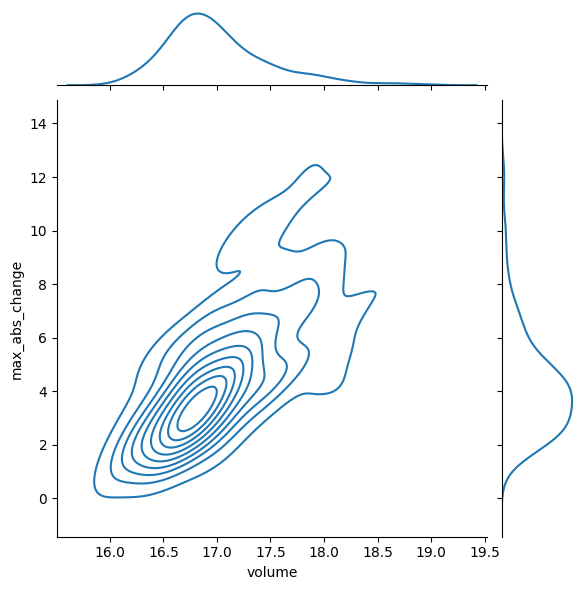

In [12]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
 )
)


# **Regression plots**
We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high
stock price - daily low stock price). To do so, we first need to isolate this data:

In [13]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy
in Python with itertools , so let's import it:


In [14]:
import itertools

**itertools** gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from itertools ; notice how the second loop doesn't
do anything:

In [15]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [16]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


The **reg_resid_plots()** function from the reg_resid_plot.py module in this folder uses **regplot()** and **residplot()** from seaborn along with itertools to
plot the regression and residuals side-by-side:

In [17]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

ModuleNotFoundError: No module named 'reg_resid_plot'

We can use lmplot() to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:


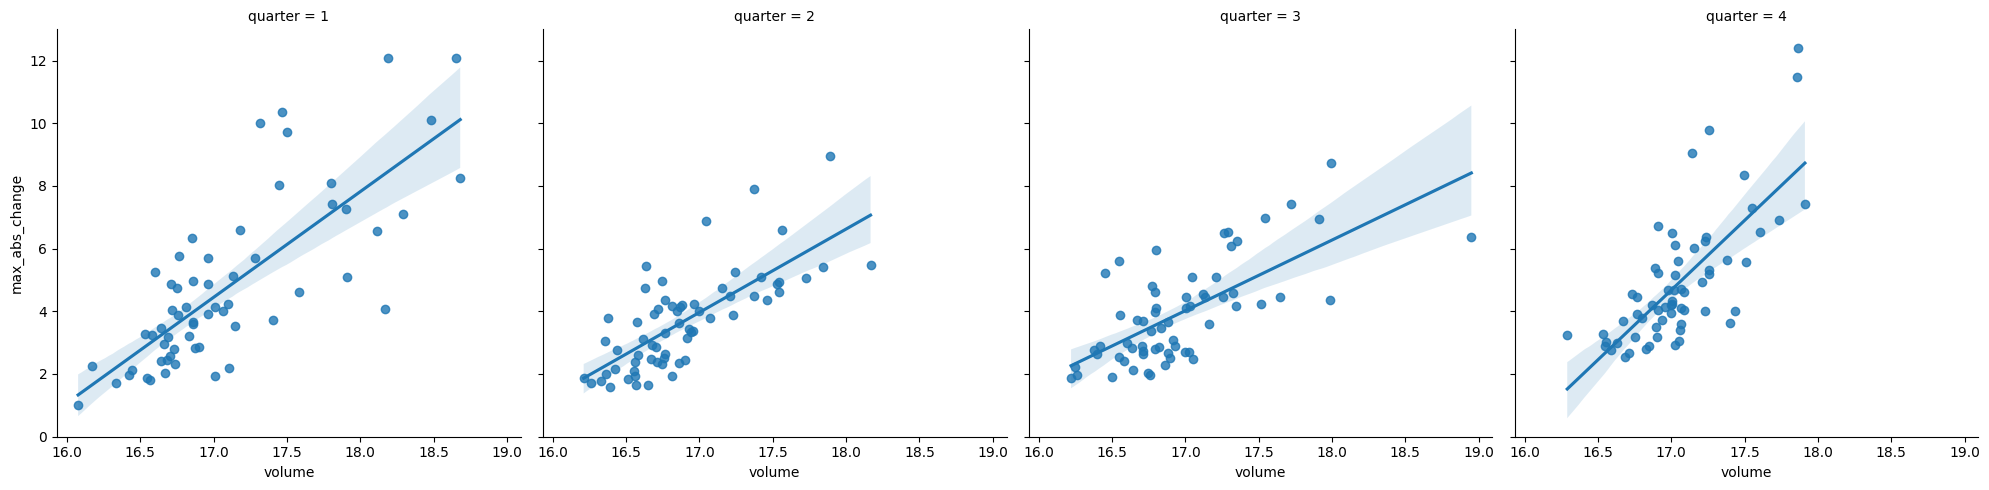

In [18]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)

# **Distributions**
Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5 (in this notebook).
# **boxenplot()**
The boxenplot is a box plot that shows additional quantiles:

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

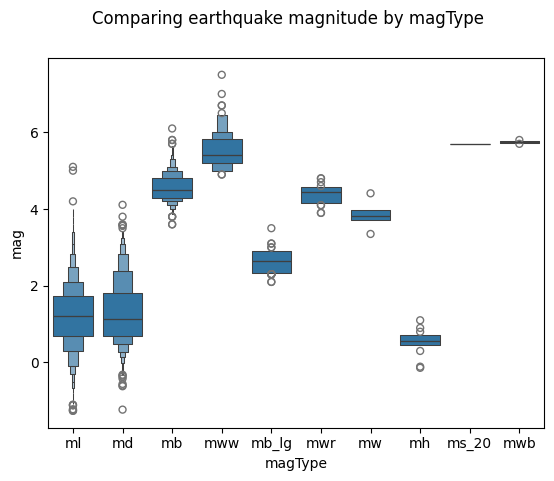

In [19]:
sns.boxenplot(
  x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

# **violinplot()**
Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

<ipython-input-20-dc5ed0aa16e5>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

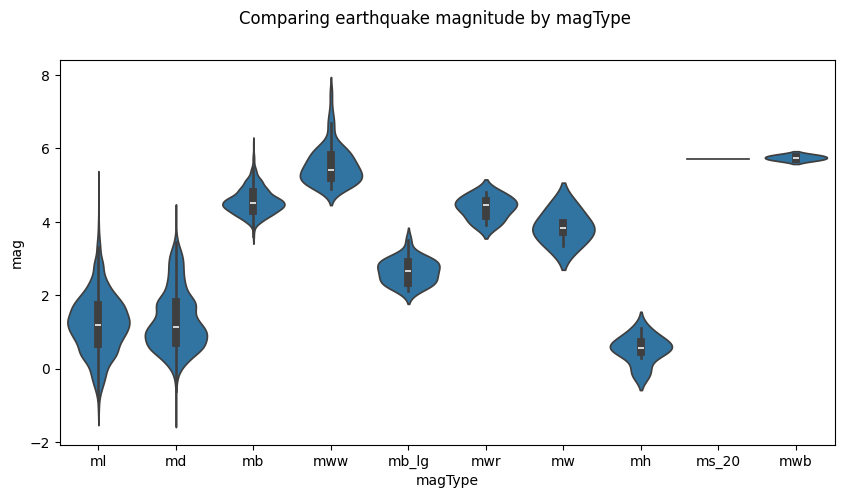

In [20]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

Faceting
We can create subplots across subsets of our data by faceting. First, we create a FacetGrid specifying how to layout the plots (which categorical column goes along the
rows and which one along the columns). Then, we call the map() method of the FacetGrid and pass in the plotting function we want to use (along with any additional
arguments).


Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed :


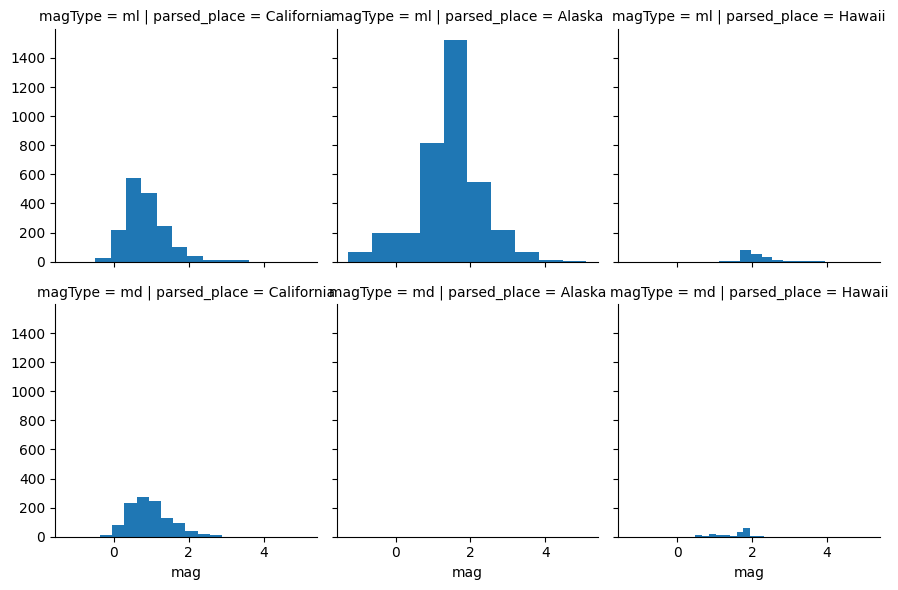

In [21]:
g = sns.FacetGrid(
 quakes[
    (quakes.parsed_place.isin([
    'California', 'Alaska', 'Hawaii'
    ]))\
    & (quakes.magType.isin(['ml', 'md']))
  ],
  row='magType',
  col='parsed_place'
)
g = g.map(plt.hist, 'mag')

# **9.5 Formatting Plots**
# **About the Data**
In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).
# **Setup**

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

# **Titles and Axis Labels**
* plt.suptitle() adds a title to plots and subplots
* plt.title() adds a title to a single plot. Note if you use subplots, it will only put the title on the last subplot, so you will need to use plt.suptitle()
* plt.xlabel() labels the x-axis
* plt.ylabel() labels the y-axis

Text(0, 0.5, 'price ($)')

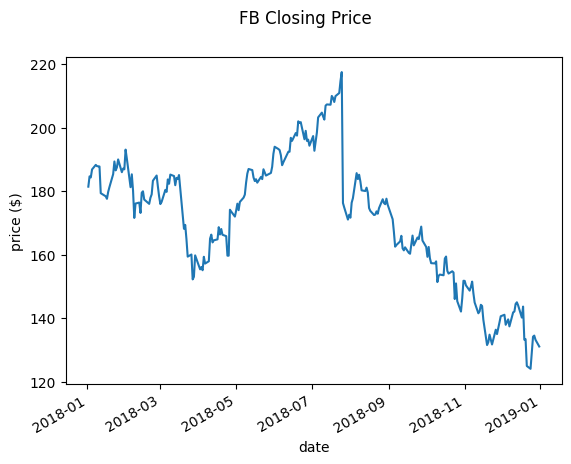

In [23]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')


# **plt.suptitle() vs. plt.title()**
Check out what happens when we call plt.title() with subplots:

Text(0, 0.5, 'price ($)')

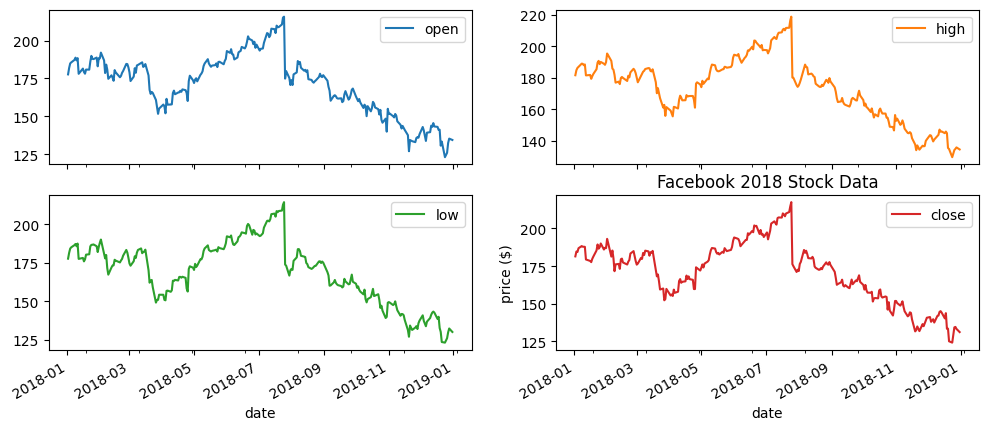

In [24]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Simply getting into the habit of using plt.suptitle() instead of plt.title() will save you this confusion:

Text(0, 0.5, 'price ($)')

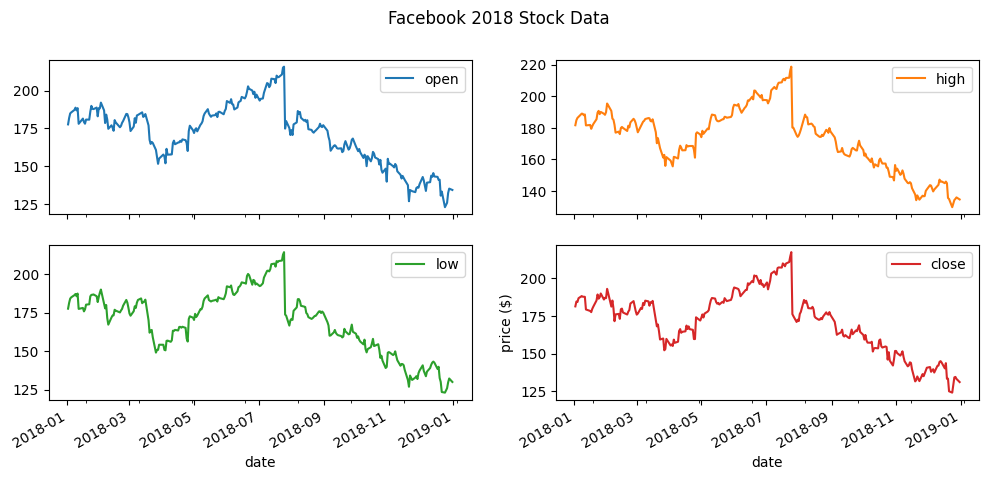

In [25]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

# **Legends**
plt.legend() adds a legend to the plot. We can specify where to place it with the loc parameter:

Text(0, 0.5, 'price ($)')

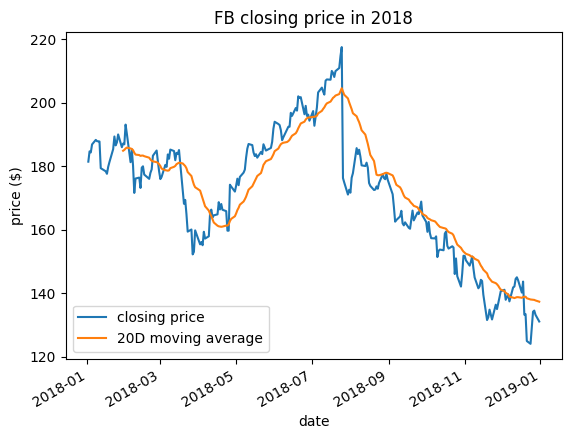

In [26]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title='FB closing price in 2018',
    label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

# **Formatting Axes**
# **Specifying axis limits**
plt.xlim() and plt.ylim() can be used to specify the minimum and maximum values for the axis. Passing None will have matplotlib determine the limit.

Text(0, 0.5, 'price ($)')

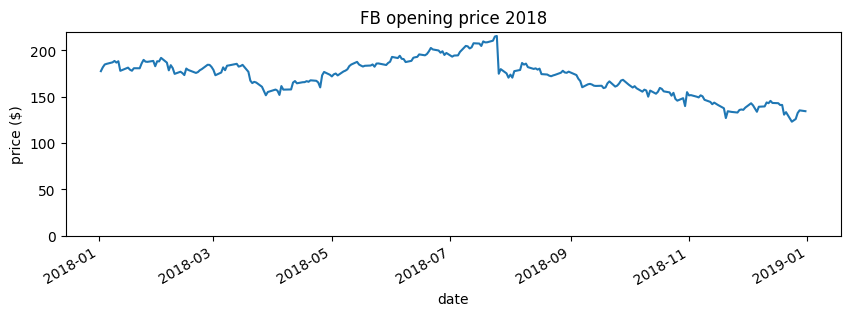

In [27]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

# **Formatting the Axis Ticks**
We can use plt.xticks() and plt.yticks() to provide tick labels and specify, which ticks to show. Here, we show every other month:

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

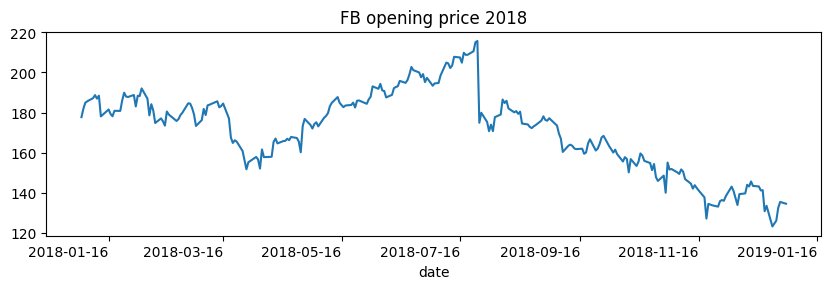

In [28]:
import calendar

fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')


# Using ticker
# PercentFormatter
We can use ticker.PercentFormatter and specify the denominator ( xmax ) to use when calculating the percentages. This gets passed to the
set_major_formatter() method of the xaxis or yaxis on the Axes .


Text(0, 0.5, 'percent of highest price ($218.62)')

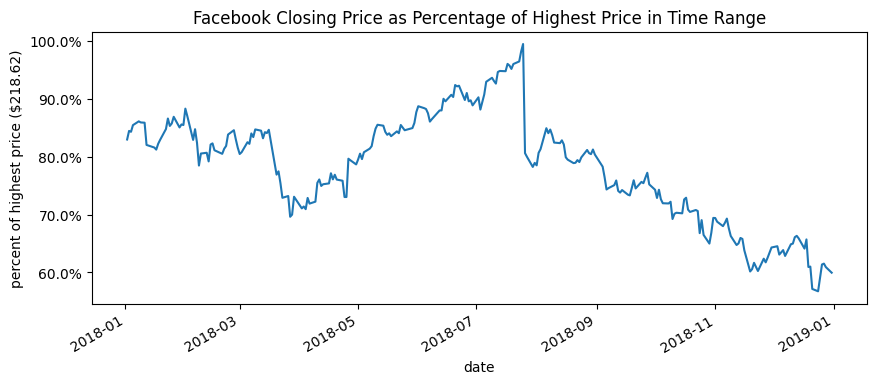

In [29]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
    figsize=(10, 4),
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
    fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

# MultipleLocator
Say we have the following data. The points only take on integer values for x .

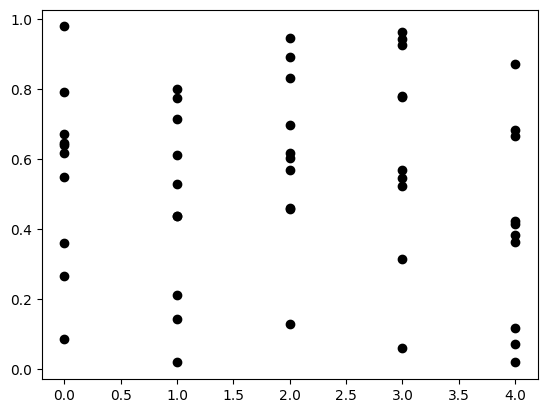

In [30]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

If we don't want to show decimal values on the x-axis, we can use the MultipleLocator . This will give ticks for all multiples of a number specified with the base
parameter. To get integer values, we use base=1 :

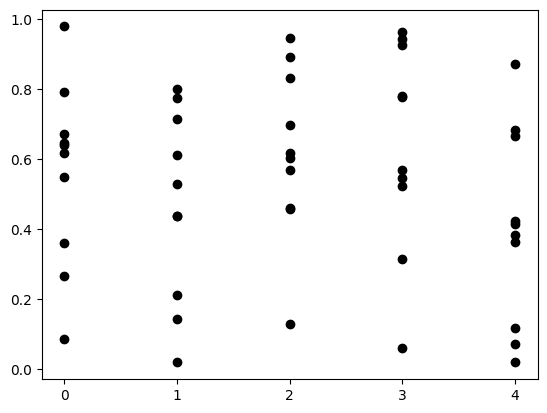

In [31]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
    ticker.MultipleLocator(base=1)
)

# **9.6 pandas.plotting subpackage**
Pandas provides some extra plotting functions for a few select plot types.
# **About the Data**
In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).
# **Setup**

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)


# **Scatter matrix**

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

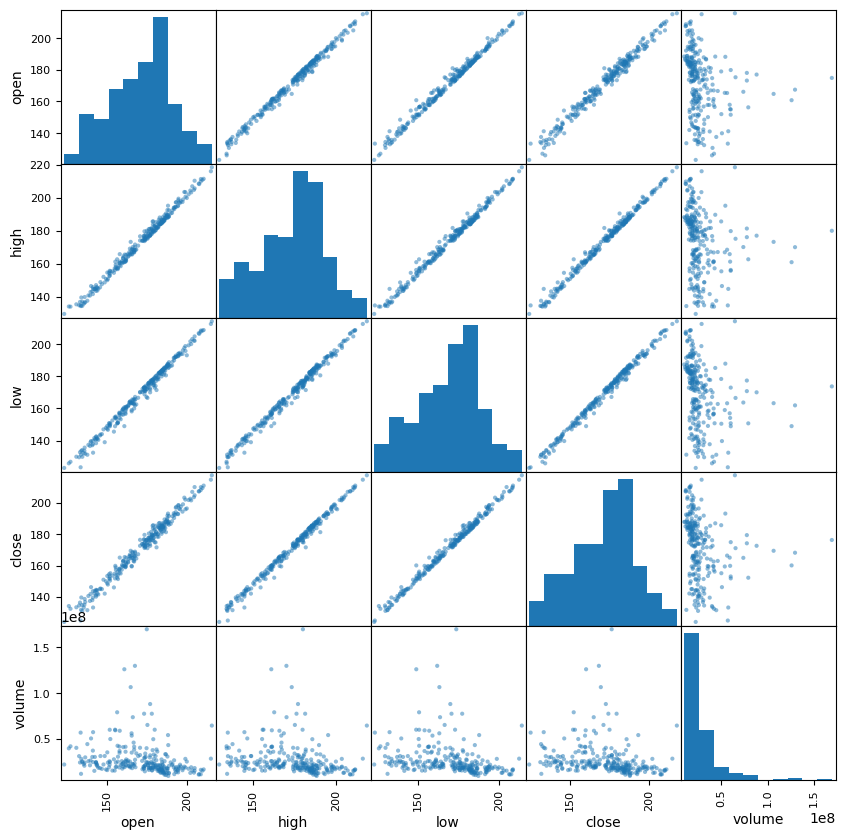

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

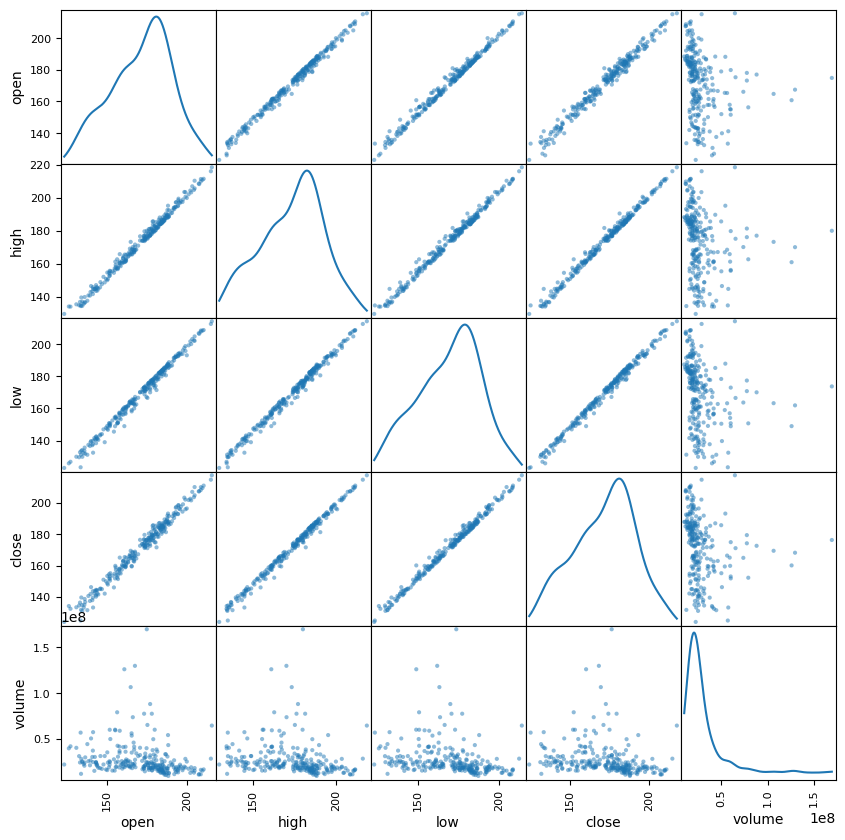

In [34]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

# **Lag plot**
Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

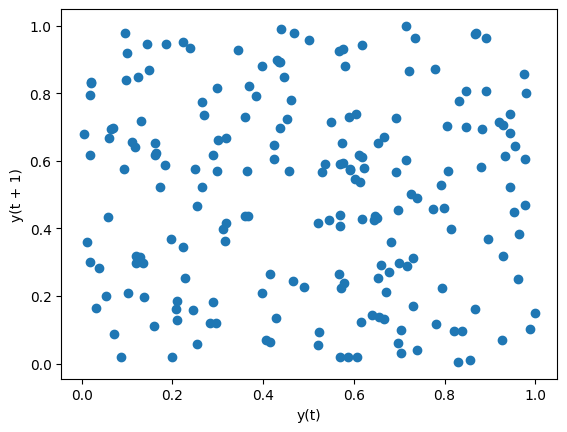

In [35]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

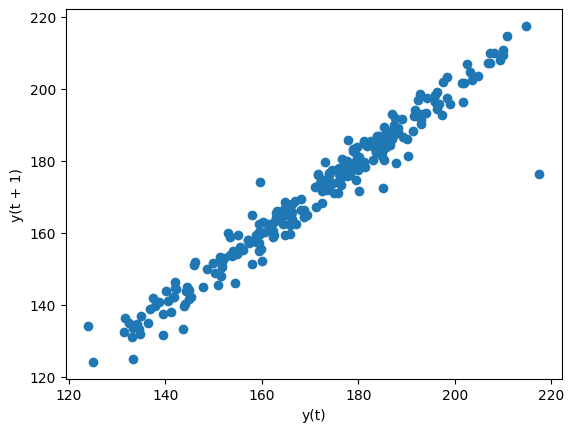

In [36]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

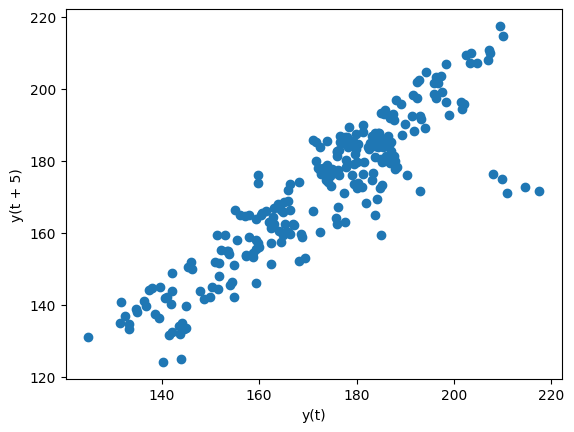

In [37]:
lag_plot(fb.close, lag=5)

# **Autocorrelation plots**

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

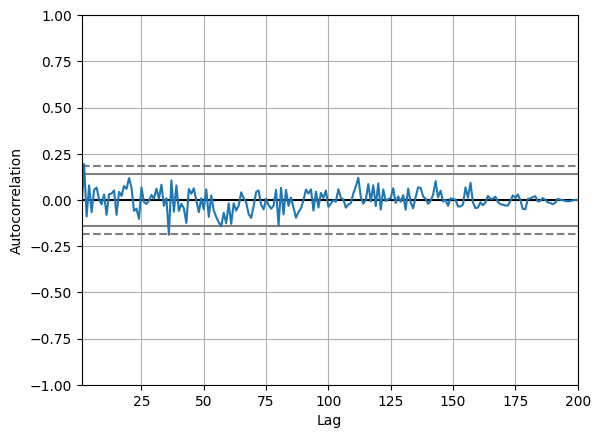

In [38]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

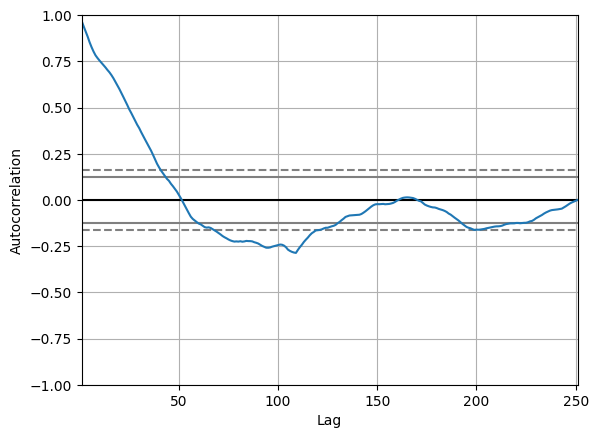

In [39]:
autocorrelation_plot(fb.close)

# **Bootstrap plot**
This plot helps us understand the uncertainty in our summary statistics:

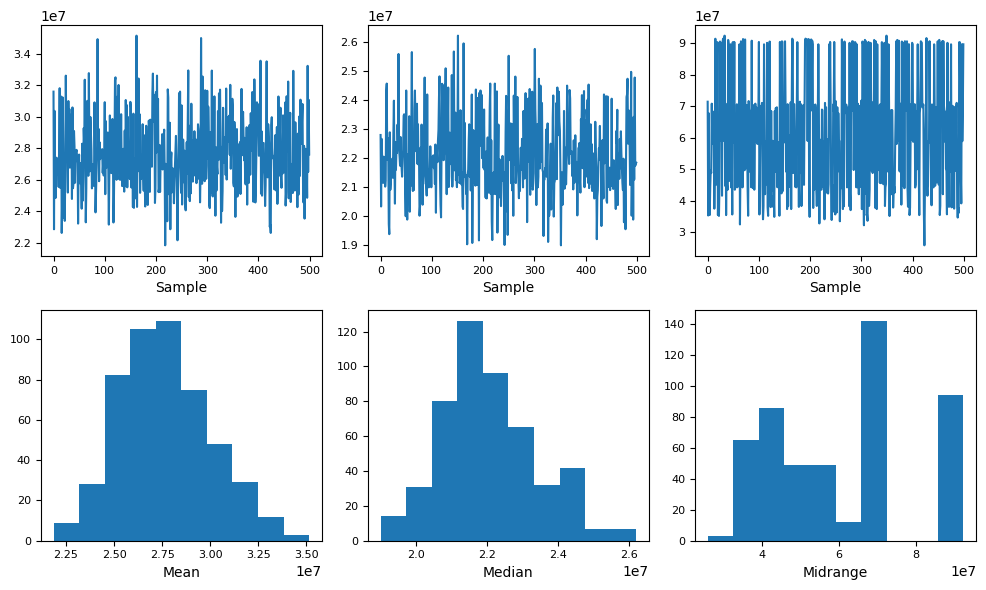

In [40]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# **Data Analysis:**

The different procedures can be really useful for exploring different data sets that we can gather. For example the **Bootstrap Plot**, we can use this to Utilize Bootstrap plots to estimate the uncertainty of statistical estimates such as mean, median, variance, and etc. The **Scatter Matrix** can Create a scatter matrix to visualize pairwise relationships between multiple variables. The **Titles and Axis Labels** can Ensure clarity and readability by providing informative titles and axis labels. and more different ways to explore and identify datasets.

# **Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Using query to get the values of mag and tsunami depending on the magType 'mb'
tsunami_mb = quakes.query('magType == "mb"')[['mag', 'tsunami']]
tsunami_mb

,mag,tsunami
9,4.7,0
13,4.5,0
55,4.6,0
67,4.6,0
91,4.7,0
...,...,...
9297,4.2,0
9304,5.1,1
9309,4.8,0
9319,4.4,0


<Axes: >

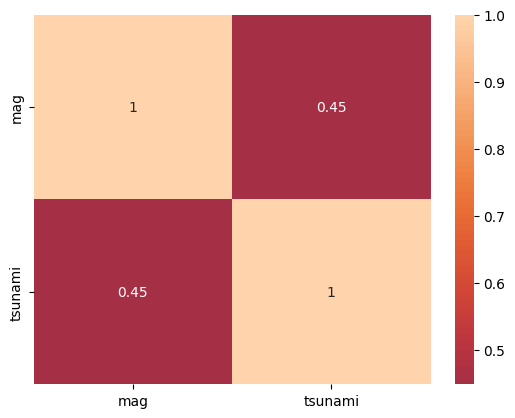

In [56]:
# getting the heatmap of tsunami_mb
sns.heatmap(tsunami_mb.corr(),annot=True, center=0)

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [64]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


3. Fill in the area between the bounds in the plot from exercise #2.

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

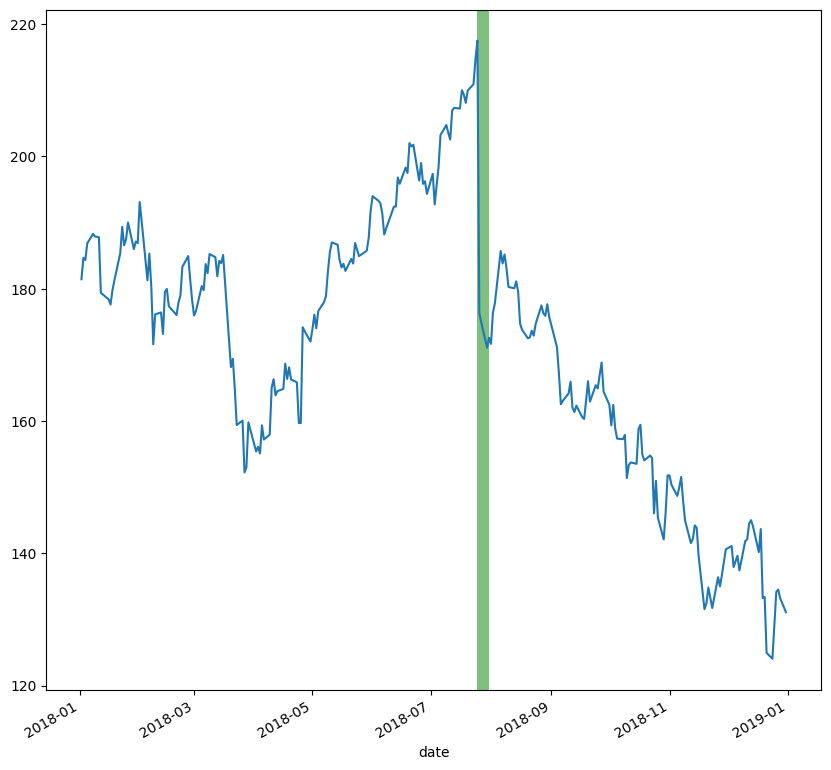

In [72]:
# Getting the close value in fb
closing_price = fb['close']
closing_price.plot(figsize = (10, 10))

# Using the avcspan() to create a colored rectangle that marks the large decline in Facebook
plt.axvspan('2018-07-25','2018-07-31', facecolor = 'green', alpha = 0.5)

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
* Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018

Text(2018-03-20, 168.15, 'FTC investigation')

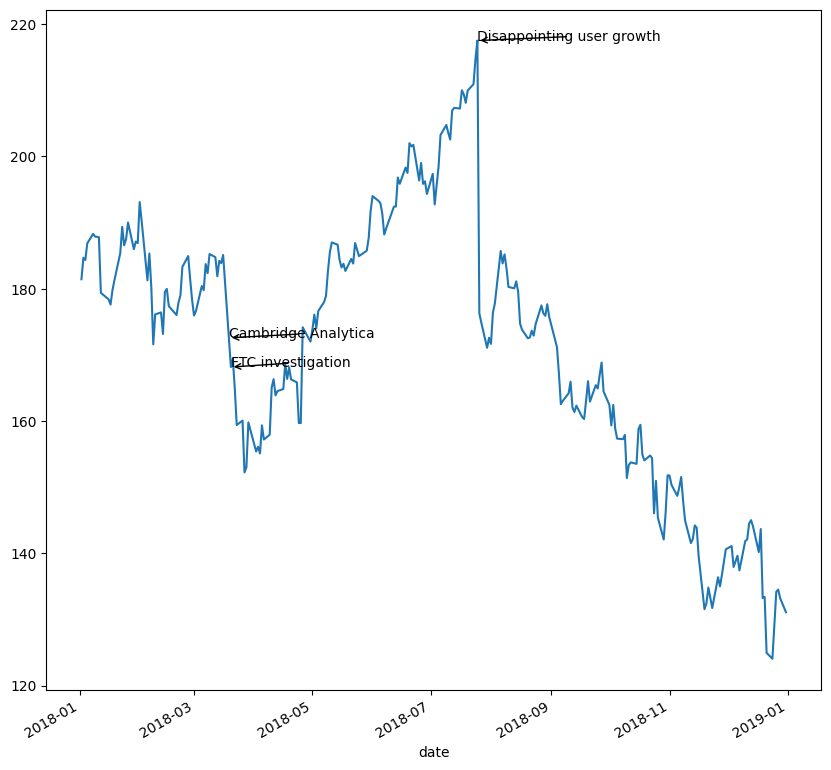

In [78]:
# Changing figure size
closing_price.plot(figsize = (10, 10))

# Assigning every single date
event_date = '2018-07-25'

# locating the specific date in the close column
specific_close = fb.loc[event_date, 'close']

event_date2 = '2018-03-19'
specific_close2 = fb.loc[event_date2, 'close']

event_date3 = '2018-03-20'
specific_close3 = fb.loc[event_date3, 'close']

# Annotating the Event in the date
plt.annotate('Disappointing user growth', xy = (event_date, specific_close),
             xytext = (event_date, specific_close), arrowprops = dict(facecolor='black', arrowstyle='->'))

plt.annotate('Cambridge Analytica', xy = (event_date2, specific_close2),
             xytext = (event_date2, specific_close2), arrowprops = dict(facecolor='black', arrowstyle='->'))

plt.annotate('FTC investigation', xy = (event_date3, specific_close3),
             xytext = (event_date3, specific_close3), arrowprops = dict(facecolor='black', arrowstyle='->'))

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own

<ipython-input-79-1e4c9af8520c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')


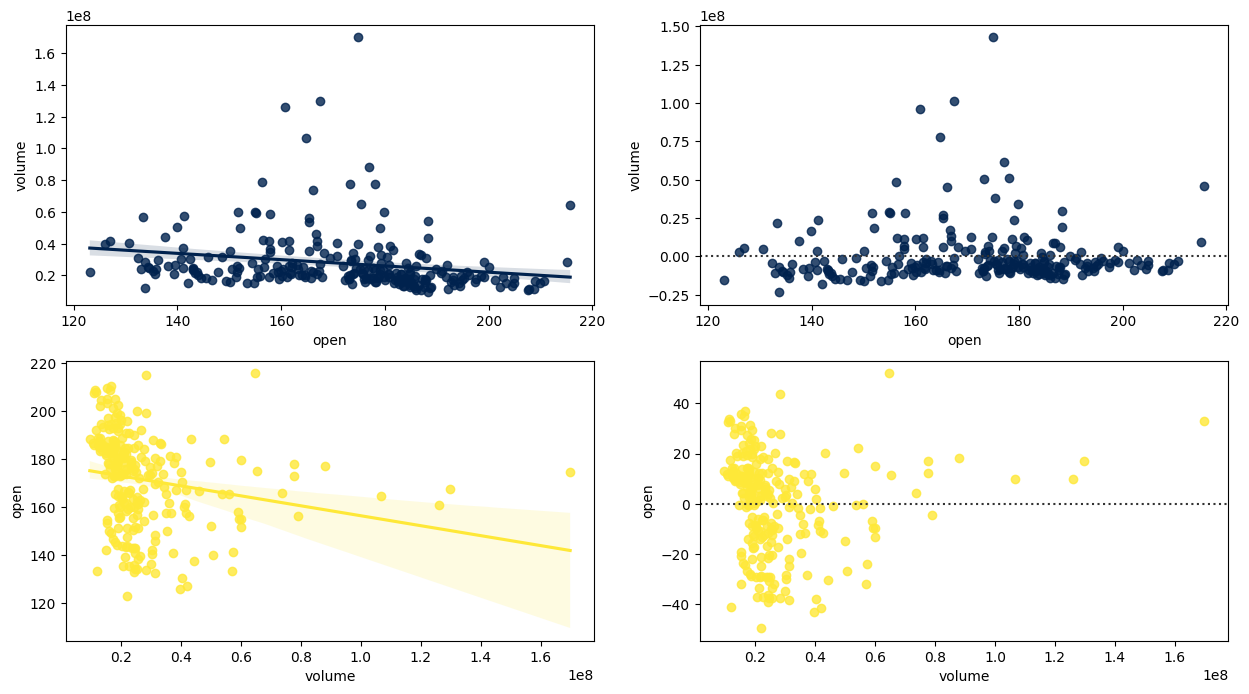

In [79]:
def reg_resid_plots(data):
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
    cmap = plt.cm.get_cmap('cividis')
    colors = [cmap(i) for i in np.linspace(0, 1, permutation_count)]
    for (x, y), axes, color in zip(
            itertools.permutations(data.columns, 2),
            ax,
            colors):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig
reg_resid_plots(fb[['open', 'volume']])

# **Summary/Conclusion:**

By applying these techniques in the procedures that we made, analysts can conduct a basic yet comprehensive data analysis, uncovering insights, identifying patterns, and effectively communicating findings to stakeholders. This approach not only enhances understanding but also facilitates informed decision-making based on the data at hand.